In [1]:
!pip install nibabel
import os


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
%matplotlib inline
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [27]:
root = Path(r"C:\Users\hp\Desktop\Medical image analysis\Atrium_segmentation\Task02_Heart\imagesTr")
label = Path(r"C:\Users\hp\Desktop\Medical image analysis\Atrium_segmentation\Task02_Heart\labelsTr")

The code loops through all files in the label directory, changes their file extension to .nii.gz, and renames them. This is common in medical imaging (e.g., MRI or CT scans) where .nii.gz is a compressed NIfTI file format used for storing medical images.

In [4]:
import os 

for filename in os.listdir(label):
  pre, ext = os.path.splitext(filename)
  os.rename(os.path.join(label, filename), os.path.join(label, pre + '.nii.gz'))


In [28]:
for filename in os.listdir(label):
    # Check if the filename contains multiple '.nii'
    if filename.count('.nii') > 1:
        # Construct the full old path
        old_path = os.path.join(label, filename)
        
        # Replace all occurrences of '.nii' except the first one
        new_filename = filename.replace('.nii', '', filename.count('.nii') - 1)
        new_path = os.path.join(label, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f'Renamed: {filename} to {new_filename}')

Renamed: ._la_014.nii.nii.nii.nii.gz to ._la_014.nii.gz
Renamed: ._la_029.nii.nii.nii.nii.gz to ._la_029.nii.gz
Renamed: la_003.nii.nii.nii.nii.gz to la_003.nii.gz
Renamed: la_004.nii.nii.nii.nii.gz to la_004.nii.gz
Renamed: la_005.nii.nii.nii.nii.gz to la_005.nii.gz
Renamed: la_007.nii.nii.nii.nii.gz to la_007.nii.gz
Renamed: la_009.nii.nii.nii.nii.gz to la_009.nii.gz
Renamed: la_010.nii.nii.nii.nii.gz to la_010.nii.gz
Renamed: la_011.nii.nii.nii.nii.gz to la_011.nii.gz
Renamed: la_014.nii.nii.nii.nii.gz to la_014.nii.gz
Renamed: la_016.nii.nii.nii.nii.gz to la_016.nii.gz
Renamed: la_017.nii.nii.nii.nii.gz to la_017.nii.gz
Renamed: la_018.nii.nii.nii.nii.gz to la_018.nii.gz
Renamed: la_019.nii.nii.nii.nii.gz to la_019.nii.gz
Renamed: la_020.nii.nii.nii.nii.gz to la_020.nii.gz
Renamed: la_021.nii.nii.nii.nii.gz to la_021.nii.gz
Renamed: la_022.nii.nii.nii.nii.gz to la_022.nii.gz
Renamed: la_023.nii.nii.nii.nii.gz to la_023.nii.gz
Renamed: la_024.nii.nii.nii.nii.gz to la_024.nii.gz
Rena

Example of what the function does:
- Input: /data/project/imagesTr/image1.nii.gz
- After converting to a list of parts: ['/', 'data', 'project', 'imagesTr', 'image1.nii.gz']
- The function replaces "imagesTr" with "labelsTr": ['/', 'data', 'project', 'labelsTr', 'image1.nii.gz']
- Output: /data/project/labelsTr/image1.nii.gz

In [5]:
def change_img_to_label_path(path):
  parts = list(path.parts)
  parts[parts.index("imagesTr")] = "labelsTr"
  return Path(*parts)


In [6]:
sample_path = list(root.glob("la*"))[0]
sample_path_label = change_img_to_label_path(sample_path)

In [7]:
sample_path, sample_path_label

(WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Task02_Heart/imagesTr/la_003.nii.gz'),
 WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Task02_Heart/labelsTr/la_003.nii.gz'))

In [8]:
data = nib.load(sample_path)
label = nib.load(sample_path)

mri = data.get_fdata()
mask = label.get_fdata().astype(np.uint8)

In [9]:
nib.aff2axcodes(data.affine)

('R', 'A', 'S')

In [10]:

!pip install celluloid


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from celluloid import Camera
from IPython.display import HTML

In [12]:

fig = plt.figure()
camera = Camera(fig)

for i in range(mri.shape[2]):
  plt.imshow(mri[:,:,i], cmap='bone')
  mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
  camera.snap()
animation=camera.animate()

<IPython.core.display.Javascript object>

In [15]:

import matplotlib as mpl
mpl.rcParams['animation.writer'] = 'ffmpeg'


In [17]:
animation.save('animation.gif', writer='pillow')


In [18]:
def normalize(full_volume): #perform z-normalization
  mu = full_volume.mean()
  std = np.std(full_volume)
  normalized = (full_volume - mu) / std
  return normalized

def standardize(normalized):
  standardized = (normalized - normalized.min() / normalized.max() - normalized.min())
  return standardized

In [19]:
all_files = list(root.glob("la*"))
len(all_files)

20

In [29]:

for counter, path_to_mri_data in enumerate(tqdm(all_files)):

  path_to_label = change_img_to_label_path(path_to_mri_data)
  label_data = nib.load(path_to_label)
  print(label_data)
     



100%|██████████| 20/20 [00:00<00:00, 122.70it/s]


<class 'nibabel.nifti1.Nifti1Image'>
data shape (320, 320, 130)
affine:
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320 130   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      

In [31]:
save_root = Path("Preprocessed/")

for counter, path_to_mri_data in enumerate(tqdm(all_files)):

  path_to_label = change_img_to_label_path(path_to_mri_data)
  mri = nib.load(path_to_mri_data)
  assert nib.aff2axcodes(mri.affine) == ("R","A", "S")
  mri_data = mri.get_fdata()
  label_data = nib.load(path_to_label).get_fdata().astype(np.uint8)
  # Crop volume and label mask. Reduce 32 px from top and 32 px from bottom.
  # Addtionally crop front and back with same size. Dont crop viewing axis
  mri_data = mri_data[32:-32, 32:-32]
  label_data = label_data[32:-32, 32:-32]
  #Normalize and standardize the images
  normalized_mri_data = normalize(mri_data)
  standardized_mri_data = standardize(normalized_mri_data)
# Check if train or val data and create corresponding path
  if counter < 17:
    current_path = save_root/"train"/str(counter)
  else:
    current_path = save_root/"val"/str(counter)
    # Loop over the slices in the full volume and store the images and labels in the data/masks directory
  for i in range(standardized_mri_data.shape[-1]):
      slice = standardized_mri_data[:,:,i]
      mask = label_data[:,:,i]
      slice_path = current_path/"data"
      mask_path = current_path/"masks"
      slice_path.mkdir(parents=True, exist_ok=True)
      mask_path.mkdir(parents=True, exist_ok=True)
      np.save(slice_path/str(i), slice)
      np.save(mask_path/str(i), mask)






















100%|██████████| 20/20 [00:32<00:00,  1.65s/it]


Slice shape: (256, 256)
Mask shape: (256, 256)


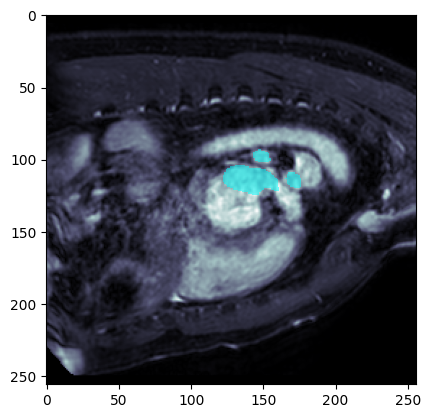

In [41]:
# Define paths and load data
path = Path(r"C:\Users\hp\Desktop\Medical image analysis\Atrium_segmentation\Preprocessed\train\3")
file = "50.npy"

slice = np.load(path / "data" / file)
mask = np.load(path / "masks" / file)

# Check if slice and mask are loaded correctly
print("Slice shape:", slice.shape)
print("Mask shape:", mask.shape)

# Ensure that both are the same shape
assert slice.shape == mask.shape, "Slice and mask must have the same shape!"

# Create the figure
plt.figure()

# Plot the slice
plt.imshow(slice, cmap="bone")

# Apply the mask
mask_ = np.ma.masked_where(mask == 0, mask)

# Overlay the mask with transparency
plt.imshow(mask_, cmap="cool", alpha=0.5)  # Optional: use a color map for better contrast

# Display the plot
plt.show()
     